# General EDA of SHIF Data

@roman

4 June, 2024

---
# Settings

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Settings
# show 100 columns in pandas
pd.set_option('display.max_columns', 100)

---
# Data

In [3]:
# read parquet
df_properties = pd.read_parquet("../../data/raw/avaluos_mex.parquet")
df_properties

,VALOR_FISICO_CONSTRUCCION,ID_AVALUO,FECHA_AVALUO,COLONIA,ID_CLASE_INMUEBLE,ID_TIPO_INMUEBLE,CONSERVACION,ELEVADOR,NIVELES,CVE_REF_PROXIMIDAD_URBANA,CVE_NIVEL_EQUIPAMIENTO_URBANO,VALOR_MERCADO,VALOR_CONCLUIDO_TOTAL,NIVEL,UNIDADES_RENTABLES,EDAD_ANIOS,PRECIO M2,VIDA_UTIL_REMANENTE,CVE_CLASIFICACION_ZONA,CVE_VIGILANCIA,REGIMEN PROPIEDAD,TIPO_VIALIDAD,NIVEL_INFRAESTRUCTURA,Table Names-4,CUENTA_PREDIAL,ID_UV,ID_MUNICIPIO,ID_ENTIDAD_F,CLAVE_CONTROLADOR,CLAVE_VALUADOR,ID_OTORGANTE,CP,LATITUD,LONGITUD,RECAMARAS,BANOS,MEDIO BANOS,ESTACIONAMIENTO,SUPERFICIE_TERRENO,SUPERFICIE_CONSTRUIDA,SUPERFICIE_ACCESORIA,SUPERFICIE_VENDIBLE,VALOR_FISICO_TERRENO_M2
0,425901.00,30001190710390500,2019-09-06,SD,2,2,4.0,0.0,1,5,1,720691,721000,3,1,0,8633,50,2,NaN,PRIVADA INDIVIDUAL,NaN,NaN,None,NaN,30001,27,7,302349,403733,30001,29160,16.665061,-92.949447,2,1,0,1,267,83,0,83,490.000000
1,1035475.65,9067200711805890,2020-04-27,SD,4,2,4.0,0.0,1,5,1,1841577,1842000,3,2,15,11091,55,3,1.0,PRIVADA INDIVIDUAL,3.0,NaN,None,NaN,9067,107,7,1844523,408526,40012,30535,16.137817,-93.000447,3,1,0,3,620,166,0,166,1142.000000
2,491898.00,9067200311678970,2020-01-20,SD,4,2,4.0,0.0,1,5,1,1393971,1394000,3,1,9,18703,61,3,1.0,PRIVADA INDIVIDUAL,2.0,NaN,None,NaN,9067,8,3,408047,1641235,40012,23570,23.593706,-109.588844,1,1,0,2,561,74,0,74,1278.900000
3,1611371.52,090682009R0225150,2020-05-27,SD,4,2,4.0,1.0,4,1,1,4305275,4305000,3,1,25,12353,45,4,NaN,PRIVADA INDIVIDUAL,NaN,NaN,None,NaN,9068,3,9,1742315,1400027,30001,4600,19.310875,-99.158103,2,1,0,0,143,348,0,348,8918.000000
4,697726.22,090832021R0653330,2020-12-08,SD,3,2,4.0,2.0,2,2,1,826000,829000,3,1,20,5954,40,3,NaN,PRIVADA INDIVIDUAL,NaN,NaN,None,NaN,9083,51,21,1844210,1639485,30001,74585,18.510228,-98.609661,4,2,1,0,93,139,0,139,1398.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,459452.28,9069231510399560,2023-09-22,CONJUNTO URBANO SAN BUENAVENTURA,3,3,4.0,2.0,2,2,4,922424,922000,3,4,22,12500,38,5,1.0,PRIVADA COLECTIVA,2.0,NaN,None,NaN,9069,39,15,1100411,2300064,30001,56536,19.309292,-98.858728,2,1,0,1,67,73,0,73,3822.313433
1048571,296946.00,9068231510776010,2023-09-12,CONJ HORIZONTAL RANCHO LA PALMA III,3,3,4.0,2.0,2,2,4,630000,630000,3,1,27,9929,33,5,1.0,PRIVADA COLECTIVA,2.0,NaN,None,NaN,9068,20,15,1844743,1300995,30001,55717,19.645500,-99.121889,2,1,0,1,35,63,0,63,4652.571429
1048572,295328.25,9068231510774060,2023-09-01,CONJ URB COFRADIA III,3,3,4.0,2.0,1,2,4,730000,730000,3,4,20,14705,40,5,1.0,PRIVADA COLECTIVA,2.0,NaN,None,NaN,9068,121,15,1844743,1300995,30001,54715,19.698444,-99.218722,2,1,0,1,41,49,0,49,9217.247561
1048573,400387.80,9081231510244250,2023-09-06,CONJUNTO URBANO BULEVARES DEL LAGO ETAPAS VII ...,3,3,4.0,2.0,2,2,4,1019705,1020000,3,4,13,15093,47,5,1.0,PRIVADA COLECTIVA,2.0,NaN,None,NaN,9081,60,15,1844797,1101765,30001,54473,19.609017,-99.274625,2,1,0,1,60,67,0,67,9486.501167


In [4]:
# see columns
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 43 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   VALOR_FISICO_CONSTRUCCION      1048575 non-null  float64       
 1   ID_AVALUO                      1048575 non-null  object        
 2   FECHA_AVALUO                   1048575 non-null  datetime64[ns]
 3   COLONIA                        1048575 non-null  object        
 4   ID_CLASE_INMUEBLE              1048575 non-null  int64         
 5   ID_TIPO_INMUEBLE               1048575 non-null  int64         
 6   CONSERVACION                   1048574 non-null  float64       
 7   ELEVADOR                       1015862 non-null  float64       
 8   NIVELES                        1048575 non-null  int64         
 9   CVE_REF_PROXIMIDAD_URBANA      1048575 non-null  int64         
 10  CVE_NIVEL_EQUIPAMIENTO_URBANO  1048575 non-null  int64

In [5]:
# see all columns that have 'valor'
df_properties.filter(like='VALOR')

,VALOR_FISICO_CONSTRUCCION,VALOR_MERCADO,VALOR_CONCLUIDO_TOTAL,VALOR_FISICO_TERRENO_M2
0,425901.00,720691,721000,490.000000
1,1035475.65,1841577,1842000,1142.000000
2,491898.00,1393971,1394000,1278.900000
3,1611371.52,4305275,4305000,8918.000000
4,697726.22,826000,829000,1398.000000
...,...,...,...,...
1048570,459452.28,922424,922000,3822.313433
1048571,296946.00,630000,630000,4652.571429
1048572,295328.25,730000,730000,9217.247561
1048573,400387.80,1019705,1020000,9486.501167


In [6]:
# see all columns that have 'superficie'
df_properties.filter(like='SUPERFICIE')

,SUPERFICIE_TERRENO,SUPERFICIE_CONSTRUIDA,SUPERFICIE_ACCESORIA,SUPERFICIE_VENDIBLE
0,267,83,0,83
1,620,166,0,166
2,561,74,0,74
3,143,348,0,348
4,93,139,0,139
...,...,...,...,...
1048570,67,73,0,73
1048571,35,63,0,63
1048572,41,49,0,49
1048573,60,67,0,67


In [7]:
# make columns lower case and blank spaces to _
df_properties.columns = df_properties.columns.str.lower().str.replace(' ', '_')

# see all columns
df_properties.columns

Index(['valor_fisico_construccion', 'id_avaluo', 'fecha_avaluo', 'colonia',
       'id_clase_inmueble', 'id_tipo_inmueble', 'conservacion', 'elevador',
       'niveles', 'cve_ref_proximidad_urbana', 'cve_nivel_equipamiento_urbano',
       'valor_mercado', 'valor_concluido_total', 'nivel', 'unidades_rentables',
       'edad_anios', 'precio_m2', 'vida_util_remanente',
       'cve_clasificacion_zona', 'cve_vigilancia', 'regimen_propiedad',
       'tipo_vialidad', 'nivel_infraestructura', 'table_names-4',
       'cuenta_predial', 'id_uv', 'id_municipio', 'id_entidad_f',
       'clave_controlador', 'clave_valuador', 'id_otorgante', 'cp', 'latitud',
       'longitud', 'recamaras', 'banos', 'medio_banos', 'estacionamiento',
       'superficie_terreno', 'superficie_construida', 'superficie_accesoria',
       'superficie_vendible', 'valor_fisico_terreno_m2'],
      dtype='object')

---
# Time Distribution

In [8]:
# describe
df_properties['fecha_avaluo'].describe()

count                          1048575
mean     2021-05-14 02:13:24.838566912
min                2019-01-01 00:00:00
25%                2020-03-06 00:00:00
50%                2021-05-18 00:00:00
75%                2022-06-17 00:00:00
max                2023-12-31 00:00:00
Name: fecha_avaluo, dtype: object

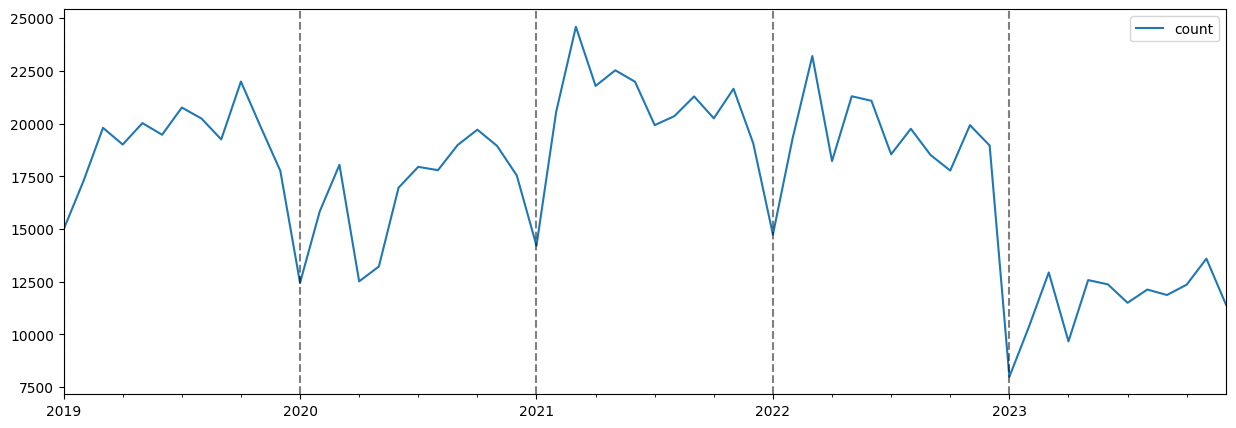

In [9]:
# time series of counts by each month and year
ts_counts = (
    df_properties
    ['fecha_avaluo'].dt.to_period('M')
    .value_counts()
    .sort_index()
    .to_frame()
    # add missing months
    .reindex(pd.period_range(
        start=df_properties['fecha_avaluo'].min().to_period('M'),
        end=df_properties['fecha_avaluo'].max().to_period('M'),
        freq='M'
        ))
    .fillna(0)
    )

# plot time series
ts_counts.plot(figsize=(15, 5))

# add line each beginning of year
for year in range(df_properties['fecha_avaluo'].dt.year.min(), df_properties['fecha_avaluo'].dt.year.max() + 1):
    plt.axvline(x=f'{year}-01', color='k', linestyle='--', alpha=0.5)

---
# Geospatial analysis

In [10]:
# look nan id_entidad_f
df_properties['id_entidad_f'].isna().sum()

0

<Axes: xlabel='id_entidad_f'>

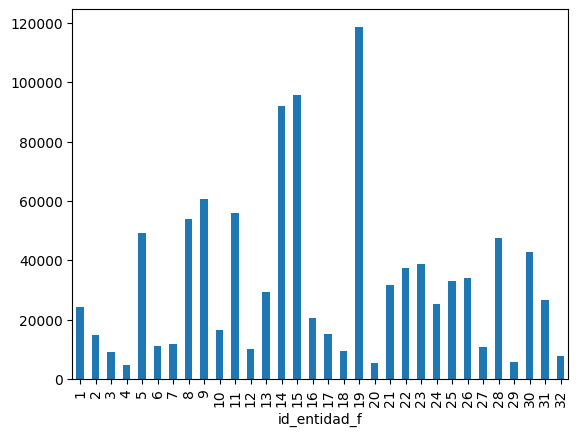

In [11]:
# cout by ID_ENTIDAD_F
df_properties['id_entidad_f'].value_counts().sort_index().plot(kind='bar')

In [12]:
# look nan latitud & longitud
df_properties[['latitud', 'longitud']].isna().sum()

latitud     0
longitud    0
dtype: int64

<Axes: >

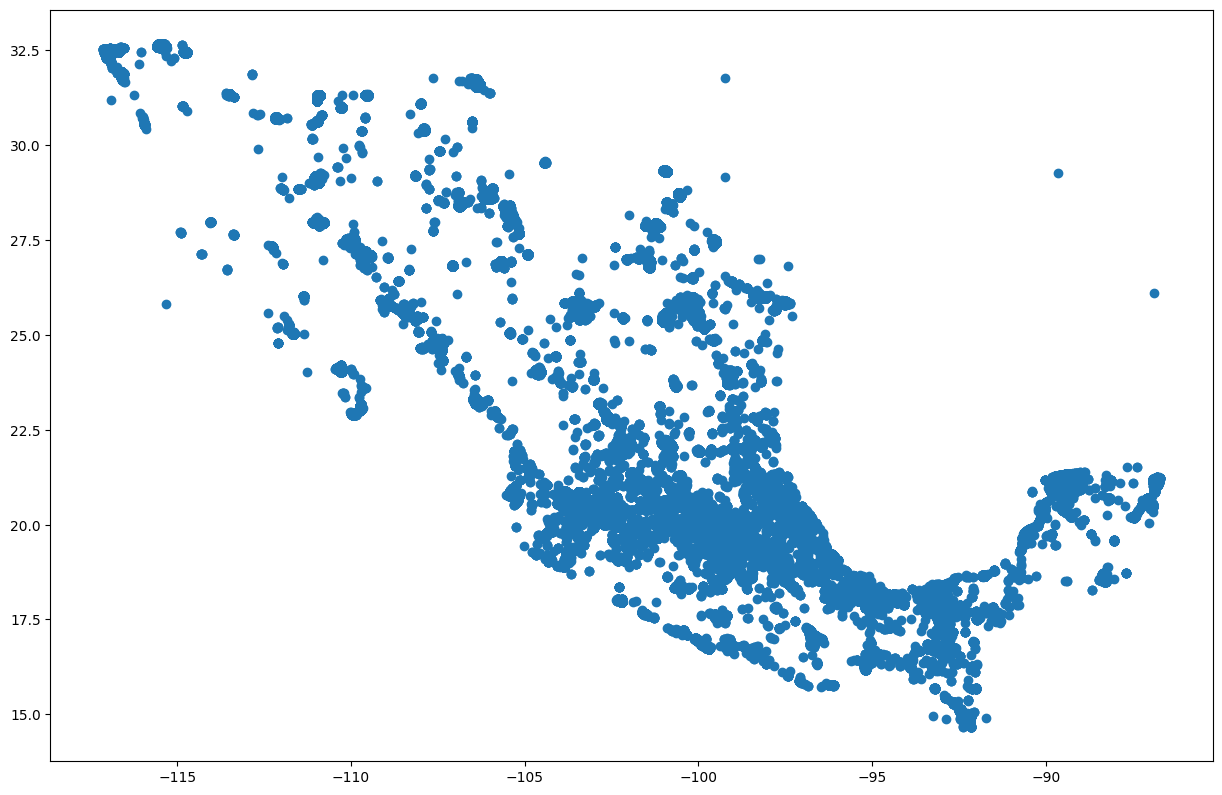

In [13]:
# plot points
gdf_properties = gpd.GeoDataFrame(
    df_properties.loc[:, ['latitud', 'longitud']],
    geometry=gpd.points_from_xy(df_properties['longitud'], df_properties['latitud']),
    crs='EPSG:4326'
    )

# plot
gdf_properties.plot(figsize=(15, 15))

---
# Absolute Prices

In [7]:
# describe
df_properties.filter(like='valor').describe()

,valor_fisico_construccion,valor_mercado,valor_concluido_total,valor_fisico_terreno_m2
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.782143e+05,1.402173e+06,1.400367e+06,4.361986e+03
std,8.597121e+05,2.156915e+06,2.152669e+06,8.959317e+03
min,0.000000e+00,0.000000e+00,2.000000e+05,0.000000e+00
25%,2.889936e+05,5.237050e+05,5.220000e+05,1.600000e+03
50%,4.152880e+05,7.733700e+05,7.710000e+05,2.400000e+03
75%,7.793775e+05,1.498000e+06,1.496000e+06,3.953000e+03
max,6.475791e+07,8.725550e+07,8.725500e+07,1.607634e+06


## Valor Concluido Total

<Axes: xlabel='valor_concluido_total', ylabel='Density'>

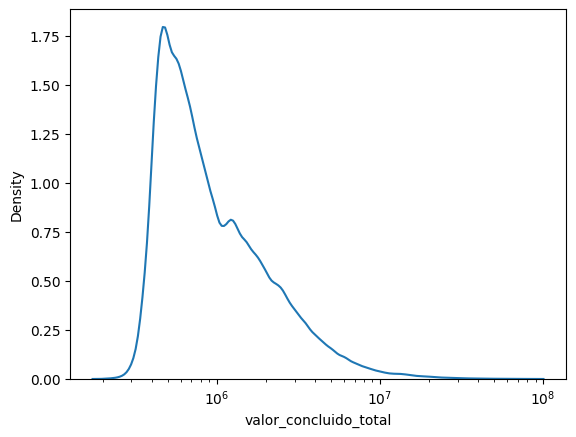

In [12]:
# plot
sns.kdeplot(df_properties, x='valor_concluido_total', log_scale=True)

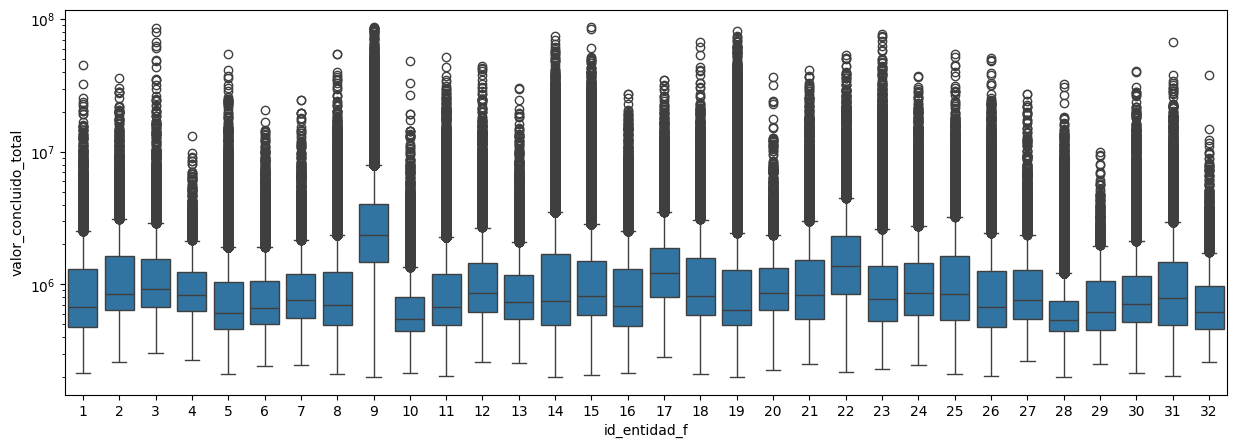

In [15]:
# create boxplot of valor_concluido_total and id_entidad_f
plt.figure(figsize=(15, 5))

sns.boxplot(
    x='id_entidad_f',
    y='valor_concluido_total',
    data=df_properties
    )

# in log scale
plt.yscale('log')


## Valor Físico Construcción

<Axes: xlabel='valor_fisico_construccion', ylabel='Density'>

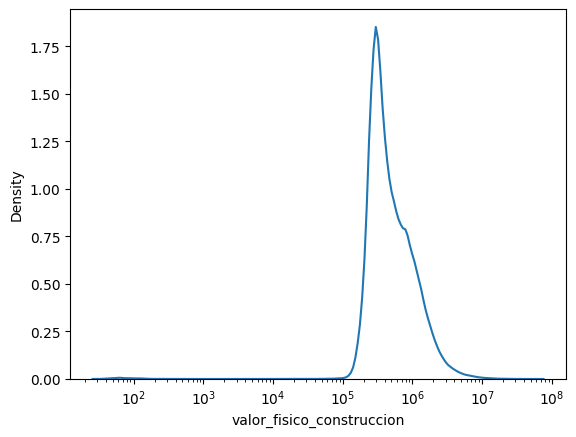

In [15]:
# plot
sns.kdeplot(df_properties.query("valor_fisico_construccion > 0"), x='valor_fisico_construccion', log_scale=True)

In [16]:
# look how many properties have valor_fisico_construccion == 0
print(df_properties['valor_fisico_construccion'].le(0).sum())
print(df_properties['valor_fisico_construccion'].le(0).mean())

12071
0.01151181365186086


## Valor Mercado

<Axes: xlabel='valor_mercado', ylabel='Density'>

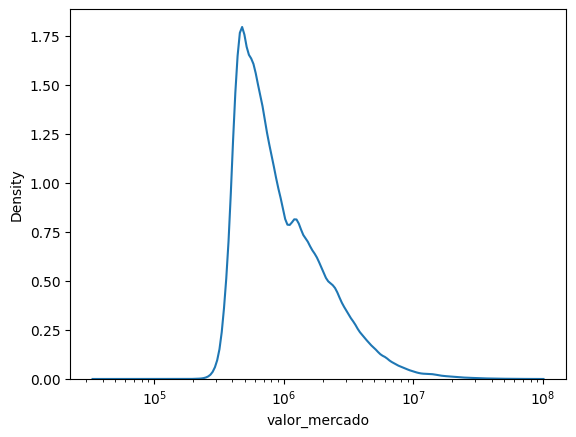

In [17]:
# plot 
sns.kdeplot(df_properties.query("valor_mercado > 0"), x='valor_mercado', log_scale=True)

In [18]:
# look how many properties have valor_mercado == 0
print(df_properties['valor_mercado'].le(0).sum())
print(df_properties['valor_mercado'].le(0).mean())

12
1.144410271082183e-05


## Valor Fisico Terreno

<Axes: xlabel='valor_fisico_terreno_m2', ylabel='Density'>

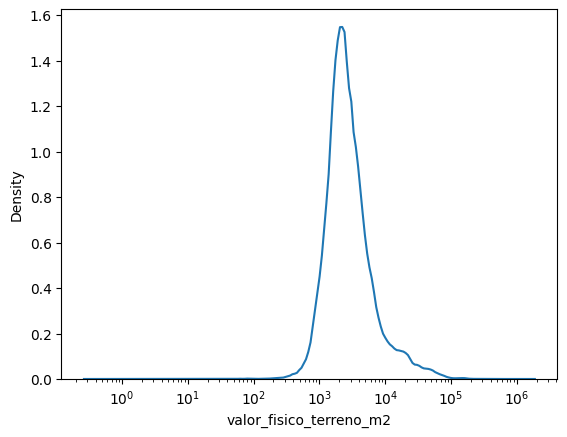

In [19]:
# plot 
sns.kdeplot(df_properties.query("valor_fisico_terreno_m2 > 0"), x='valor_fisico_terreno_m2', log_scale=True)

In [20]:
# look how many properties have valor_fisico_terreno_m2 == 0
print(df_properties['valor_fisico_terreno_m2'].le(0).sum())
print(df_properties['valor_fisico_terreno_m2'].le(0).mean())

45132
0.043041270295400905


## Price per m2

In [21]:
# describe
df_properties['precio_m2'].describe()

count    1.048575e+06
mean     1.408249e+04
std      8.939704e+03
min      5.000000e+03
25%      9.468000e+03
50%      1.157000e+04
75%      1.510200e+04
max      2.776390e+05
Name: precio_m2, dtype: float64

<Axes: xlabel='precio_m2', ylabel='Density'>

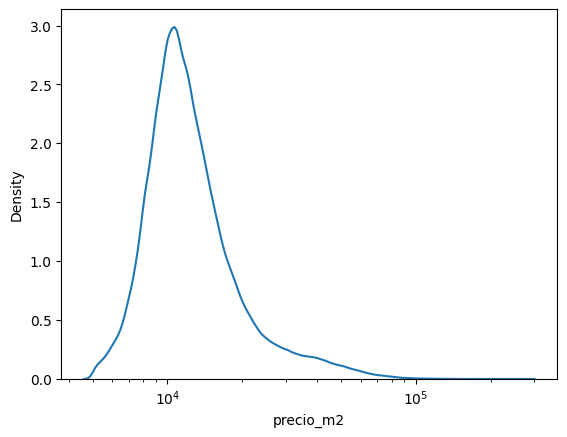

In [22]:
# plot
sns.kdeplot(df_properties, x='precio_m2', log_scale=True)

## MANUAL Price per m2

In [148]:
# generate manual feature
df_properties['precio_m2_manual'] = df_properties['valor_concluido_total'] / df_properties['superficie_vendible']

In [149]:
# describe
df_properties['precio_m2_manual'].describe()

count    1.048575e+06
mean     1.417047e+04
std      8.982710e+03
min      5.000000e+03
25%      9.534483e+03
50%      1.165116e+04
75%      1.519231e+04
max      2.781333e+05
Name: precio_m2_manual, dtype: float64

<Axes: xlabel='precio_m2_manual', ylabel='Density'>

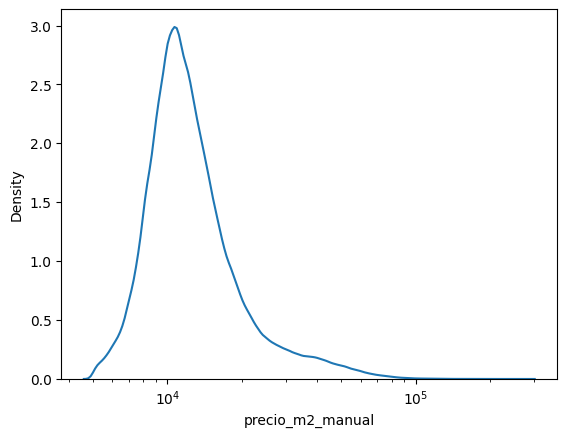

In [150]:
# plot distribution
sns.kdeplot(df_properties.query("precio_m2_manual > 0"), x='precio_m2_manual', log_scale=True)

<Axes: xlabel='precio_m2', ylabel='precio_m2_manual'>

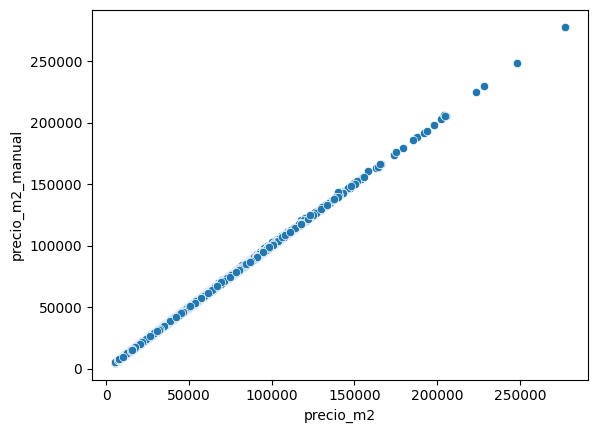

In [154]:
# plot precio_m2 vs precio_m2_manual
sns.scatterplot(
    x='precio_m2',
    y='precio_m2_manual',
    data=df_properties
    )

<Axes: >

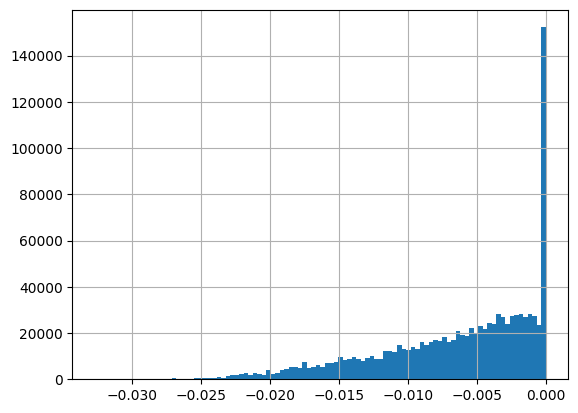

In [156]:
# rel error
(1 - df_properties['precio_m2_manual'].div(df_properties['precio_m2'])).hist(bins=100)


In [157]:
# rel error
(1 - df_properties['precio_m2_manual'].div(df_properties['precio_m2'])).describe()


count    1.048575e+06
mean    -6.532057e-03
std      5.825209e-03
min     -3.269317e-02
25%     -1.016849e-02
50%     -5.074343e-03
75%     -1.682762e-03
max      0.000000e+00
dtype: float64

<Axes: xlabel='precio_m2', ylabel='precio_m2_manual'>

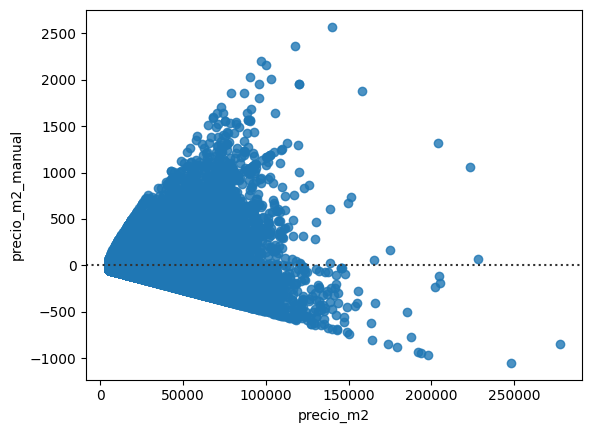

In [153]:
# plot precio_m2 vs precio_m2_manual
sns.residplot(
    x='precio_m2',
    y='precio_m2_manual',
    data=df_properties
    )

In [ ]:
TODO:
- how the p2 is estimated?
    - valor_concluido_total / superficie_vendible?
    - valor_concluido_total / superficie_total?

---
# Age

In [20]:
# describe
df_properties['edad_anios'].describe()

count    1.048575e+06
mean     6.231550e+00
std      9.309544e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.100000e+01
max      1.000000e+02
Name: edad_anios, dtype: float64

<Axes: xlabel='edad_anios', ylabel='Count'>

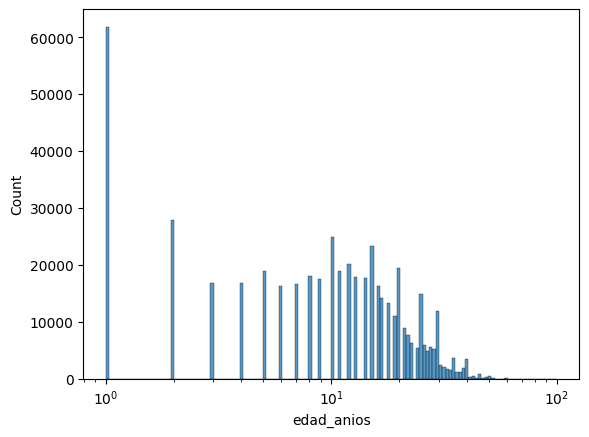

In [23]:
# plot
sns.histplot(df_properties, x='edad_anios', log_scale=True)

In [24]:
# how many with less than 0 years
print(df_properties['edad_anios'].le(0).sum())
print(df_properties['edad_anios'].le(0).mean())

539710
0.5147080561714708


---
# ID Type of Property

In [28]:
# read txt files
def read_and_convert_to_dataframe(file_path):
    """
    Reads a text file and converts it into a pandas DataFrame with 'category' and 'description' columns.

    Parameters:
        file_path (str): The path to the text file.

    Returns:
        pd.DataFrame: A DataFrame with the formatted content.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        data = []
        for line in lines:
            line = line.strip()  # Remove leading/trailing whitespace
            if line and not line.startswith('#'):  # Skip empty lines and comments
                parts = line.split(' ', 1)  # Split on the first space
                if len(parts) == 2:
                    category, description = parts
                    if category.isdigit():  # Ensure category is a number
                        data.append((int(category), description.strip()))

        # Create DataFrame
        df = pd.DataFrame(data, columns=['category', 'description'])

        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()  # Return empty DataFrame on error


In [29]:
# read txt files
table_property_type = read_and_convert_to_dataframe("../../data/catalogues/avaluos_catalogue/CAT_TIPO_INMUEBLE.txt")
table_property_type

,category,description
0,1,TERRENO
1,2,CASA HABITACIÓN
2,3,CASA EN CONDOMINIO
3,4,DEPARTAMENTO EN CONDOMINIO
4,5,OTRO
5,6,VIVIENDA MULTIPLE


In [36]:
# count
(
    df_properties['id_tipo_inmueble']
    .value_counts()
    .reset_index()
    .merge(
        table_property_type,
        left_on='id_tipo_inmueble',
        right_on='category',
        how='left'
    )
    .loc[:, ['description', 'count']]
    .assign(
        percentage=lambda x: x['count'] / x['count'].sum()
    )
)

,description,count,percentage
0,CASA HABITACIÓN,533273,0.508569
1,CASA EN CONDOMINIO,261451,0.249339
2,DEPARTAMENTO EN CONDOMINIO,234440,0.223580
3,OTRO,19384,0.018486
4,TERRENO,27,0.000026


In [26]:
# see nulls
df_properties['id_tipo_inmueble'].isna().sum()

0

---
# ID Property class

In [1]:
# read txt files
table_property_class = read_and_convert_to_dataframe("../../data/catalogues/avaluos_catalogue/CVE_CLASE_INMUEBLE, CVE_CLASE_GENERAL_INMUEBLES_ZONA Cat.ClasesConstruccion.txt")
table_property_class

NameError: name 'read_and_convert_to_dataframe' is not defined

In [54]:
# count
(
    df_properties['id_clase_inmueble']
    .value_counts()
    .reset_index()
    .sort_values('id_clase_inmueble', ignore_index=True)
    .merge(
        table_property_class,
        left_on='id_clase_inmueble',
        right_on='category',
        how='left'
    )
    .loc[:, ['description', 'category', 'count']]
    .assign(
        percentage=lambda x: x['count'] / x['count'].sum()
    )
    .sort_values('percentage', ascending=False, ignore_index=True)
)

,description,category,count,percentage
0,Interés Social,3,589793,0.562471
1,Media,4,369559,0.352439
2,Semilujo,5,48883,0.046619
3,Económica,2,28700,0.027370
4,Residencial,6,10069,0.009603
5,Residencial Plus,7,1568,0.001495
6,Única,8,3,0.000003


---
# Conservation Status

In [59]:
# look values
df_properties['conservacion'].value_counts(dropna=False, normalize=True)

conservacion
6.0    4.733252e-01
4.0    4.638419e-01
5.0    4.398541e-02
7.0    1.678659e-02
3.0    2.059938e-03
NaN    9.536752e-07
Name: proportion, dtype: float64

---
# Lifetime

In [60]:
# vida_util_remanente
df_properties['vida_util_remanente'].describe()

count    1.048575e+06
mean     5.817352e+01
std      1.126291e+01
min     -3.000000e+01
25%      5.100000e+01
50%      6.000000e+01
75%      6.800000e+01
max      8.000000e+01
Name: vida_util_remanente, dtype: float64

In [64]:
# count values less than 0
print(df_properties['vida_util_remanente'].lt(0).sum())
print(df_properties['vida_util_remanente'].lt(0).mean())

13
1.2397777936723649e-05


<Axes: xlabel='vida_util_remanente', ylabel='Count'>

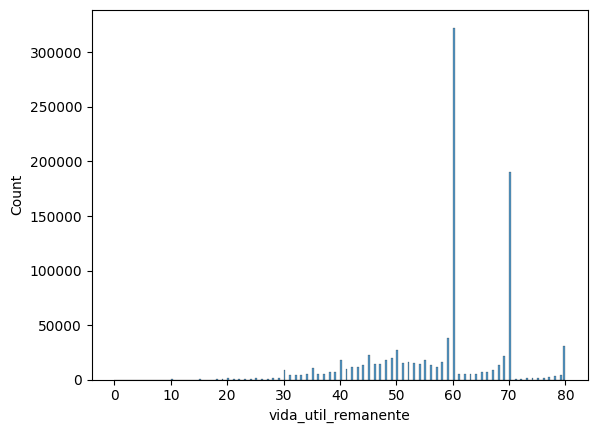

In [66]:
# plot
sns.histplot(df_properties.query("vida_util_remanente >= 0"), x='vida_util_remanente')

---
# Property Regime

In [67]:
# counts
df_properties['regimen_propiedad'].value_counts(dropna=False, normalize=True)

regimen_propiedad
PRIVADA INDIVIDUAL    0.508595
PRIVADA COLECTIVA     0.491405
Name: proportion, dtype: float64

---
# Appraiser ID

In [71]:
# counts
df_properties['clave_valuador'].value_counts(dropna=False, normalize=True)

clave_valuador
1400027    1.705744e-02
404822     8.920678e-03
1203157    7.430084e-03
700955     6.978042e-03
1101997    6.952292e-03
               ...     
2200126    9.536752e-07
700310     9.536752e-07
1742955    9.536752e-07
1537855    9.536752e-07
1203090    9.536752e-07
Name: proportion, Length: 2447, dtype: float64

In [72]:
# counts
df_properties['clave_valuador'].value_counts(dropna=False, normalize=False)

clave_valuador
1400027    17886
404822      9354
1203157     7791
700955      7317
1101997     7290
           ...  
2200126        1
700310         1
1742955        1
1537855        1
1203090        1
Name: count, Length: 2447, dtype: int64

In [73]:
# see how many clvae_valuador are only 1
print(df_properties['clave_valuador'].value_counts(dropna=False).eq(1).sum())
print(df_properties['clave_valuador'].value_counts(dropna=False).eq(1).mean())

101
0.04127503064977524


In [69]:
# look for nulls
df_properties['clave_valuador'].isna().sum()

0

---
# Controler ID

In [74]:
# counts
df_properties['clave_controlador'].value_counts(dropna=False, normalize=True)

clave_controlador
1100189    2.078058e-02
1742315    2.043726e-02
302984     1.882841e-02
1005669    1.867010e-02
408039     1.733019e-02
               ...     
303073     9.536752e-07
406066     9.536752e-07
304493     9.536752e-07
902742     9.536752e-07
1500313    9.536752e-07
Name: proportion, Length: 1039, dtype: float64

In [75]:
# counts
df_properties['clave_controlador'].value_counts(dropna=False, normalize=False)

clave_controlador
1100189    21790
1742315    21430
302984     19743
1005669    19577
408039     18172
           ...  
303073         1
406066         1
304493         1
902742         1
1500313        1
Name: count, Length: 1039, dtype: int64

In [76]:
# see how many clvae_valuador are only 1
print(df_properties['clave_controlador'].value_counts(dropna=False).eq(1).sum())
print(df_properties['clave_controlador'].value_counts(dropna=False).eq(1).mean())

37
0.0356111645813282


In [77]:
# look for nulls
df_properties['clave_controlador'].isna().sum()

0

---
# General Amenities

## Bathrooms

In [78]:
# counts
df_properties['banos'].value_counts(dropna=False, normalize=True)

banos
1     6.800486e-01
2     2.273342e-01
3     6.353289e-02
4     2.059843e-02
5     6.284720e-03
6     1.574518e-03
7     3.995899e-04
8     1.173021e-04
9     5.340581e-05
0     3.147128e-05
10    2.002718e-05
12    3.814701e-06
11    9.536752e-07
Name: proportion, dtype: float64

In [88]:
# how many are less equal to 0
print(df_properties['banos'].le(0).sum())
print(df_properties['banos'].le(0).mean())

33
3.147128245476003e-05


In [86]:
# how many bathrooms are greater than 5
print(df_properties['banos'].gt(5).sum())
print(df_properties['banos'].gt(5).mean())

2275
0.0021696111389266385


In [79]:
# medio_bano
df_properties['medio_banos'].value_counts(dropna=False, normalize=True)

medio_banos
0     6.967341e-01
1     2.903808e-01
2     1.137067e-02
3     1.210214e-03
4     2.250674e-04
5     4.673009e-05
6     1.907350e-05
9     5.722051e-06
7     2.861026e-06
10    1.907350e-06
8     1.907350e-06
11    9.536752e-07
Name: proportion, dtype: float64

In [89]:
# how many are less equal to 0
print(df_properties['medio_banos'].le(0).sum())
print(df_properties['medio_banos'].le(0).mean())

730578
0.6967341391888993


In [85]:
# how many half baths are greater than 5
print(df_properties['medio_banos'].gt(5).sum())
print(df_properties['medio_banos'].gt(5).mean())

34
3.242495768066185e-05


## Bedrooms

In [80]:
# recamaras
df_properties['recamaras'].value_counts(dropna=False, normalize=True)

recamaras
2     5.919243e-01
3     2.999566e-01
1     6.304079e-02
4     3.602699e-02
5     6.572730e-03
6     1.663210e-03
7     4.863744e-04
8     1.668932e-04
9     8.678445e-05
10    2.956393e-05
0     2.288821e-05
11    9.536752e-06
12    4.768376e-06
14    2.861026e-06
13    2.861026e-06
34    1.907350e-06
47    9.536752e-07
Name: proportion, dtype: float64

In [87]:
# recamaras
df_properties['recamaras'].value_counts(dropna=False, normalize=False)

recamaras
2     620677
3     314527
1      66103
4      37777
5       6892
6       1744
7        510
8        175
9         91
10        31
0         24
11        10
12         5
14         3
13         3
34         2
47         1
Name: count, dtype: int64

In [83]:
# recamaras unique values sort
df_properties['recamaras'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 34, 47])

## Parking Lots

In [90]:
# counts
df_properties['estacionamiento'].value_counts(dropna=False, normalize=True)

estacionamiento
1     6.593272e-01
2     1.888334e-01
0     1.339837e-01
3     1.131059e-02
4     4.744534e-03
6     7.457740e-04
5     6.580359e-04
8     1.268388e-04
7     8.106239e-05
10    7.534034e-05
9     5.149846e-05
12    2.002718e-05
11    8.583077e-06
20    6.675727e-06
14    5.722051e-06
15    4.768376e-06
13    3.814701e-06
21    3.814701e-06
16    3.814701e-06
24    1.907350e-06
25    9.536752e-07
23    9.536752e-07
19    9.536752e-07
Name: proportion, dtype: float64

In [92]:
# count less than 3
print(df_properties['estacionamiento'].lt(3).sum())
print(df_properties['estacionamiento'].lt(3).mean())

1029852
0.9821443387454403


---
# Surface

## Terrain

In [100]:
# describe
df_properties['superficie_terreno'].describe()

count    1.048575e+06
mean     1.163972e+02
std      1.449217e+02
min      0.000000e+00
25%      6.200000e+01
50%      9.400000e+01
75%      1.260000e+02
max      9.986000e+03
Name: superficie_terreno, dtype: float64

In [102]:
# count terrain surface less eq 0
print(df_properties['superficie_terreno'].le(0).sum())
print(df_properties['superficie_terreno'].le(0).mean())

126
0.00012016307846362921


In [106]:
# count terrain greater than 1000
print(df_properties['superficie_terreno'].gt(1000).sum())
print(df_properties['superficie_terreno'].gt(1000).mean())

3024
0.002883913883127101


<Axes: xlabel='superficie_terreno', ylabel='Count'>

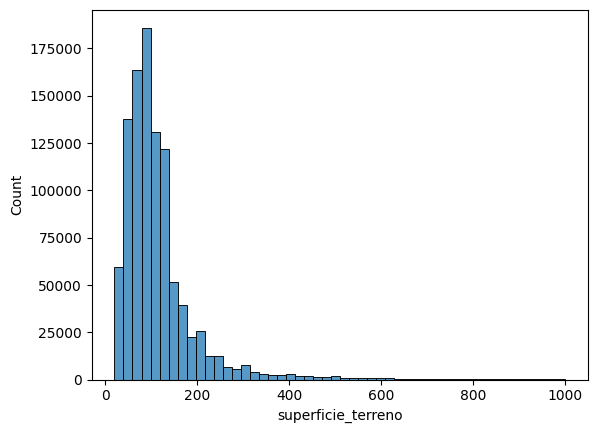

In [107]:
# distribution
sns.histplot(df_properties.query("superficie_terreno.between(20, 1_000)"), x='superficie_terreno', bins=50)

## Built Surface

In [108]:
# describe
df_properties['superficie_construida'].describe()

count    1.048575e+06
mean     8.455308e+01
std      6.159143e+01
min      0.000000e+00
25%      4.900000e+01
50%      6.400000e+01
75%      9.900000e+01
max      1.494000e+03
Name: superficie_construida, dtype: float64

In [109]:
# count terrain surface less eq 0
print(df_properties['superficie_construida'].le(0).sum())
print(df_properties['superficie_construida'].le(0).mean())

8
7.629401807214553e-06


In [110]:
# count terrain greater than 1000
print(df_properties['superficie_construida'].gt(1000).sum())
print(df_properties['superficie_construida'].gt(1000).mean())

104
9.918222349378919e-05


<Axes: xlabel='superficie_construida', ylabel='Count'>

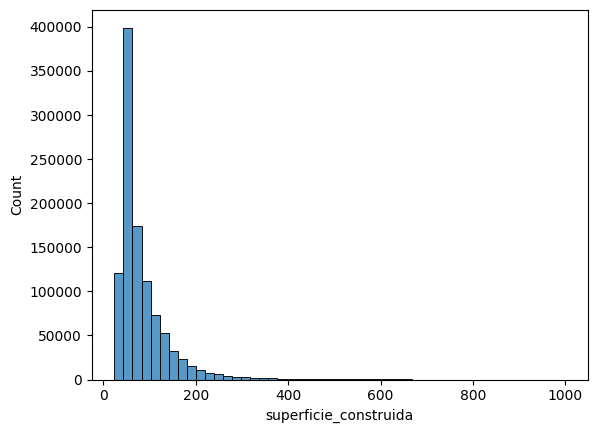

In [111]:
# distribution
sns.histplot(df_properties.query("superficie_construida.between(20, 1_000)"), x='superficie_construida', bins=50)

## Access Surface

In [116]:
# nulls
print(df_properties['superficie_accesoria'].isna().sum())
print(df_properties['superficie_accesoria'].isna().mean())

0
0.0


In [112]:
# describe
df_properties['superficie_accesoria'].describe()

count    1.048575e+06
mean     5.271093e+00
std      2.221592e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.255000e+03
Name: superficie_accesoria, dtype: float64

In [113]:
# count terrain surface less eq 0
print(df_properties['superficie_accesoria'].le(0).sum())
print(df_properties['superficie_accesoria'].le(0).mean())

778265
0.7422120496864792


In [114]:
# count terrain greater than 1000
print(df_properties['superficie_accesoria'].gt(1000).sum())
print(df_properties['superficie_accesoria'].gt(1000).mean())

19
1.8119829292134564e-05


<Axes: xlabel='superficie_accesoria', ylabel='Count'>

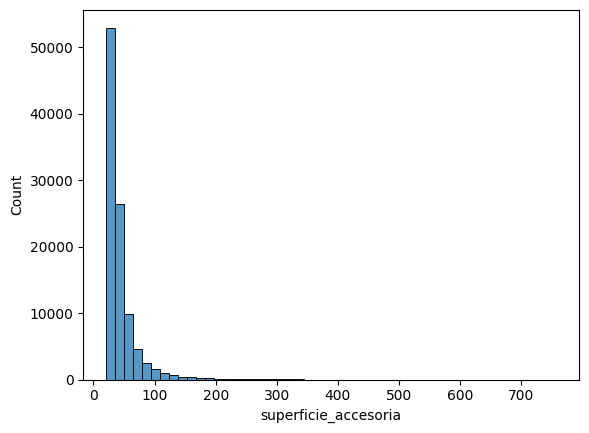

In [115]:
# distribution
sns.histplot(df_properties.query("superficie_accesoria.between(20, 1_000)"), x='superficie_accesoria', bins=50)

## Selling Area

In [121]:
# nans
print(df_properties['superficie_vendible'].isna().mean())
print(df_properties['superficie_vendible'].isna().mean())

0.0
0.0


In [117]:
# describe
df_properties['superficie_vendible'].describe()

count    1.048575e+06
mean     8.962750e+01
std      7.048789e+01
min      3.000000e+01
25%      4.900000e+01
50%      6.500000e+01
75%      1.040000e+02
max      1.494000e+03
Name: superficie_vendible, dtype: float64

In [118]:
# count terrain surface less eq 0
print(df_properties['superficie_vendible'].le(0).sum())
print(df_properties['superficie_vendible'].le(0).mean())

0
0.0


In [127]:
# count terrain surface less eq 20
print(df_properties['superficie_vendible'].le(30).sum())
print(df_properties['superficie_vendible'].le(30).mean())

1094
0.0010433206971365901


In [119]:
# count terrain greater than 1000
print(df_properties['superficie_vendible'].gt(1000).sum())
print(df_properties['superficie_vendible'].gt(1000).mean())

226
0.00021553060105381112


<Axes: xlabel='superficie_vendible', ylabel='Count'>

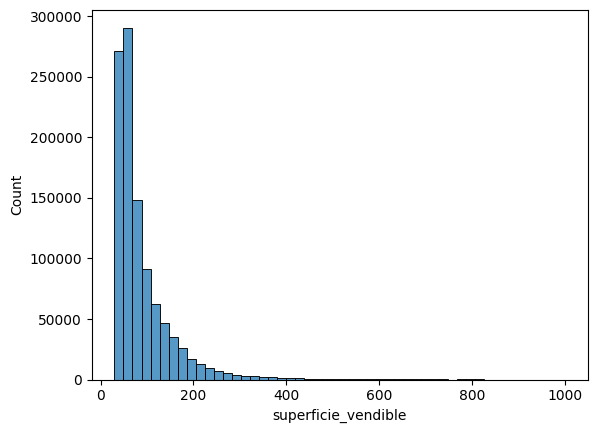

In [120]:
# distribution
sns.histplot(df_properties.query("superficie_vendible.between(20, 1_000)"), x='superficie_vendible', bins=50)

## Which terrain surface taken into account for valuation

In [8]:
# see surface cols
df_properties.filter(like='superficie')

,superficie_terreno,superficie_construida,superficie_accesoria,superficie_vendible
0,267,83,0,83
1,620,166,0,166
2,561,74,0,74
3,143,348,0,348
4,93,139,0,139
...,...,...,...,...
1048570,67,73,0,73
1048571,35,63,0,63
1048572,41,49,0,49
1048573,60,67,0,67


In [9]:
# case where built surface is the same as surface sold
df_properties['superficie_vendible'].eq(df_properties['superficie_construida']).mean()

0.751442672197983

In [11]:
# see case where built surface is the same as surface sold group by id_tipo_inmueble
(
    df_properties
    .assign(
        same_surface_construida=lambda x: x['superficie_vendible'].eq(x['superficie_construida']),
        same_surface_terreno=lambda x: x['superficie_vendible'].eq(x['superficie_terreno']),
        same_surface_accesoria=lambda x: x['superficie_vendible'].eq(x['superficie_accesoria']),
        same_surface_construida_terreno=lambda x: x['superficie_vendible'].eq(x['superficie_construida'] + x['superficie_terreno']),
        same_surface_construida_accesoria=lambda x: x['superficie_vendible'].eq(x['superficie_construida'] + x['superficie_accesoria']),
    )
    .groupby('id_tipo_inmueble')
    [['same_surface_construida', 'same_surface_terreno', 'same_surface_accesoria', 'same_surface_construida_terreno', 'same_surface_construida_accesoria']]
    .mean()
)

,same_surface_construida,same_surface_terreno,same_surface_accesoria,same_surface_construida_terreno,same_surface_construida_accesoria
id_tipo_inmueble,,,,,
1,0.074074,0.777778,0.000000,0.296296,0.074074
2,0.691143,0.010372,0.000039,0.000024,0.852633
3,0.786449,0.024372,0.000031,0.000096,0.881385
4,0.854056,0.162340,0.000222,0.001548,0.896762
5,0.698050,0.083058,0.000000,0.000052,0.860504


In [134]:
# look cases where terrain & built surface are the same
(
    df_properties
    .groupby('id_tipo_inmueble')
    .apply(lambda x: x['superficie_construida'].eq(x['superficie_terreno']).mean())
)

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_73359/3576346843.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['superficie_construida'].eq(x['superficie_terreno']).mean())


id_tipo_inmueble
1    0.222222
2    0.010222
3    0.023568
4    0.156087
5    0.090384
dtype: float64

TODO:
- how is the relationship between selling surface and the 3 types of surface?

In [21]:
# see case where built surface is the same as surface sold group by id_tipo_inmueble
df_properties = (
    df_properties
    .assign(
        surface_construida_accesoria=lambda x: x['superficie_construida'] + x['superficie_accesoria']
    )
)

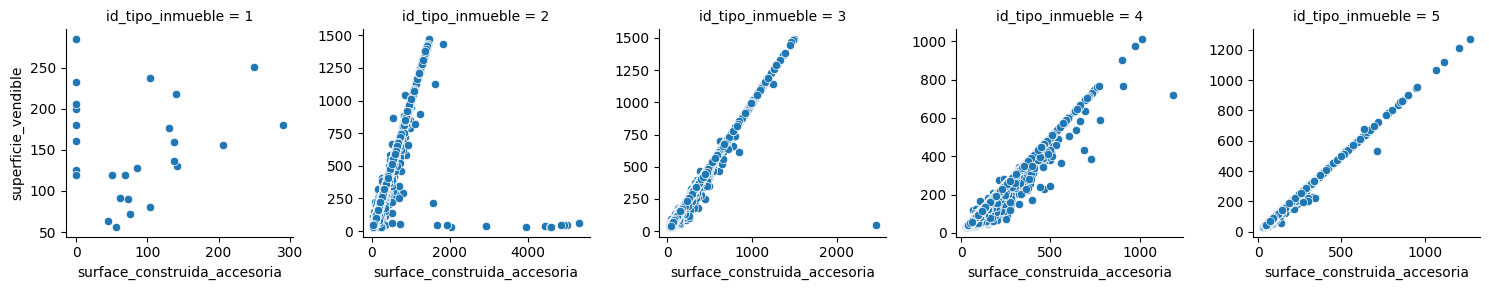

In [26]:
# see relationship between superficie_vendible and same_surface_construida_accesoria
g = sns.FacetGrid(
    df_properties,
    col='id_tipo_inmueble',
    col_wrap=5,
    sharex=False,
    sharey=False,
    )

g.map(
    sns.scatterplot,
    'surface_construida_accesoria',
    'superficie_vendible',
    )


note:
- remove only properties which superficie_vendible is less than superficie_construida + superficie_accesoria !!!

---
# Sandbox

In [38]:
df_properties.columns

Index(['valor_fisico_construccion', 'id_avaluo', 'fecha_avaluo', 'colonia',
       'id_clase_inmueble', 'id_tipo_inmueble', 'conservacion', 'elevador',
       'niveles', 'cve_ref_proximidad_urbana', 'cve_nivel_equipamiento_urbano',
       'valor_mercado', 'valor_concluido_total', 'nivel', 'unidades_rentables',
       'edad_anios', 'precio_m2', 'vida_util_remanente',
       'cve_clasificacion_zona', 'cve_vigilancia', 'regimen_propiedad',
       'tipo_vialidad', 'nivel_infraestructura', 'table_names-4',
       'cuenta_predial', 'id_uv', 'id_municipio', 'id_entidad_f',
       'clave_controlador', 'clave_valuador', 'id_otorgante', 'cp', 'latitud',
       'longitud', 'recamaras', 'banos', 'medio_banos', 'estacionamiento',
       'superficie_terreno', 'superficie_construida', 'superficie_accesoria',
       'superficie_vendible', 'valor_fisico_terreno_m2'],
      dtype='object')

In [39]:
df_properties.head()

,valor_fisico_construccion,id_avaluo,fecha_avaluo,colonia,id_clase_inmueble,id_tipo_inmueble,conservacion,elevador,niveles,cve_ref_proximidad_urbana,cve_nivel_equipamiento_urbano,valor_mercado,valor_concluido_total,nivel,unidades_rentables,edad_anios,precio_m2,vida_util_remanente,cve_clasificacion_zona,cve_vigilancia,regimen_propiedad,tipo_vialidad,nivel_infraestructura,table_names-4,cuenta_predial,id_uv,id_municipio,id_entidad_f,clave_controlador,clave_valuador,id_otorgante,cp,latitud,longitud,recamaras,banos,medio_banos,estacionamiento,superficie_terreno,superficie_construida,superficie_accesoria,superficie_vendible,valor_fisico_terreno_m2
0,425901.00,30001190710390500,2019-09-06,SD,2,2,4.0,0.0,1,5,1,720691,721000,3,1,0,8633,50,2,NaN,PRIVADA INDIVIDUAL,NaN,NaN,None,NaN,30001,27,7,302349,403733,30001,29160,16.665061,-92.949447,2,1,0,1,267,83,0,83,490.0
1,1035475.65,9067200711805890,2020-04-27,SD,4,2,4.0,0.0,1,5,1,1841577,1842000,3,2,15,11091,55,3,1.0,PRIVADA INDIVIDUAL,3.0,NaN,None,NaN,9067,107,7,1844523,408526,40012,30535,16.137817,-93.000447,3,1,0,3,620,166,0,166,1142.0
2,491898.00,9067200311678970,2020-01-20,SD,4,2,4.0,0.0,1,5,1,1393971,1394000,3,1,9,18703,61,3,1.0,PRIVADA INDIVIDUAL,2.0,NaN,None,NaN,9067,8,3,408047,1641235,40012,23570,23.593706,-109.588844,1,1,0,2,561,74,0,74,1278.9
3,1611371.52,090682009R0225150,2020-05-27,SD,4,2,4.0,1.0,4,1,1,4305275,4305000,3,1,25,12353,45,4,NaN,PRIVADA INDIVIDUAL,NaN,NaN,None,NaN,9068,3,9,1742315,1400027,30001,4600,19.310875,-99.158103,2,1,0,0,143,348,0,348,8918.0
4,697726.22,090832021R0653330,2020-12-08,SD,3,2,4.0,2.0,2,2,1,826000,829000,3,1,20,5954,40,3,NaN,PRIVADA INDIVIDUAL,NaN,NaN,None,NaN,9083,51,21,1844210,1639485,30001,74585,18.510228,-98.609661,4,2,1,0,93,139,0,139,1398.0
